In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('testVer1.csv') ## exracting the csv file

In [3]:
df.head(20)

,Target,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  5960 non-null   int64  
 1   var1    5960 non-null   int64  
 2   var2    5442 non-null   float64
 3   var3    5848 non-null   float64
 4   var4    5708 non-null   object 
 5   var5    5681 non-null   object 
 6   var6    5445 non-null   float64
 7   var7    5252 non-null   float64
 8   var8    5380 non-null   float64
 9   var9    5652 non-null   float64
 10  var10   5450 non-null   float64
 11  var11   5738 non-null   float64
 12  var12   4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
df.describe()

,Target,var1,var2,var3,var6,var7,var8,var9,var10,var11,var12
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


###### Data cleaning 

##### Checking and Handling the Missing values

In [6]:
df.isnull().sum()  ## checking  for missing values

Target       0
var1         0
var2       518
var3       112
var4       252
var5       279
var6       515
var7       708
var8       580
var9       308
var10      510
var11      222
var12     1267
dtype: int64

<AxesSubplot:>

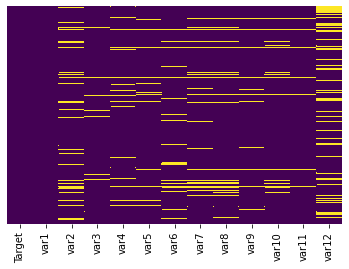

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df['var4']=np.where(df['var4']=="HomeImp",1,0) ## coverting cateorical to numical using label encoding
df.head()

,Target,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,1,1100,25860.0,39025.0,1,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,1,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,1,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,1,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [9]:
df['var6'].unique()  ## checking unique values in var6 column

array([10.5 ,  7.  ,  4.  ,   nan,  3.  ,  9.  ,  5.  , 11.  , 16.  ,
       18.  ,  2.5 ,  8.  , 19.  ,  4.5 ,  2.  , 12.  , 22.  , 10.  ,
       26.  ,  6.  ,  1.  ,  8.5 , 21.  ,  1.5 , 28.  , 20.  , 13.  ,
        1.6 ,  3.5 ,  0.5 ,  1.8 ,  0.  ,  2.6 , 14.  ,  0.1 ,  0.4 ,
       17.5 ,  1.7 ,  0.3 , 24.  , 15.  ,  1.4 , 31.  , 23.  ,  9.5 ,
       22.8 ,  2.2 ,  0.8 , 25.  , 29.  , 27.  , 17.  ,  5.6 ,  0.6 ,
        6.5 ,  7.5 ,  5.5 ,  9.9 ,  3.8 , 12.6 ,  0.25,  0.2 , 30.  ,
        2.3 ,  0.9 ,  7.2 , 17.6 ,  0.7 ,  2.9 , 13.5 ,  3.7 , 12.9 ,
       29.9 , 41.  ,  0.75,  8.8 ,  6.6 ,  7.4 ,  9.2 , 19.5 ,  1.3 ,
        5.3 ,  4.6 ,  1.9 ,  8.9 ,  9.8 ,  3.2 ,  9.3 , 14.4 ,  3.9 ,
       17.8 , 24.5 , 33.  , 36.  , 35.  , 34.  , 28.5 , 32.  ,  4.3 ,
        8.3 ])

In [10]:
df['var6'].value_counts()  ## checking the fequecncy of the value

0.0     415
1.0     363
2.0     347
5.0     333
4.0     324
       ... 
6.6       1
24.5      1
12.9      1
19.5      1
3.2       1
Name: var6, Length: 99, dtype: int64

In [11]:
df['var6'].mean()

8.922268135904508

In [12]:
## filling missing value with mean
df['var6']=df['var6'].fillna(df['var6'].mean())

In [13]:
df['var6'].isnull().sum() ## checking the missing value

0

In [14]:
df['var1'].unique()

array([ 1100,  1300,  1500,  1700,  1800,  2000,  2100,  2200,  2300,
        2400,  2500,  2800,  2900,  3000,  3100,  3200,  3300,  3400,
        3500,  3600,  3700,  3800,  3900,  4000,  4100,  4200,  4300,
        4400,  4500,  4700,  4800,  4900,  5000,  5100,  5200,  5300,
        5400,  5500,  5600,  5700,  5800,  5900,  6000,  6100,  6200,
        6300,  6400,  6500,  6600,  6700,  6800,  6900,  7000,  7100,
        7200,  7300,  7400,  7500,  7600,  7700,  7800,  7900,  8000,
        8100,  8200,  8300,  8400,  8500,  8600,  8700,  8800,  8900,
        9000,  9100,  9200,  9300,  9400,  9500,  9600,  9700,  9800,
        9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700,
       10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600,
       11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500,
       12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400,
       13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300,
       14400, 14500,

In [15]:
df['var1'].value_counts()

15000    105
10000     81
20000     74
25000     73
12000     69
        ... 
35300      1
68000      1
59800      1
38800      1
65500      1
Name: var1, Length: 540, dtype: int64

In [16]:
df['var1'].mean()

18607.96979865772

In [17]:
df['var1']=df['var1'].fillna(df['var1'].mean())

In [18]:
df['var2'].unique()

array([25860., 70053., 13500., ..., 54045., 50370., 48811.])

In [19]:
df['var2'].value_counts()

42000.0     11
47000.0     10
65000.0      9
55000.0      7
124000.0     7
            ..
31400.0      1
147622.0     1
21137.0      1
93413.0      1
108763.0     1
Name: var2, Length: 5053, dtype: int64

In [20]:
df['var2']=df['var2'].fillna(df['var2'].mean())

In [21]:
df['var3'].unique()

array([39025., 68400., 16700., ..., 92924., 91861., 88934.])

In [22]:
df['var3'].value_counts()

60000.0     15
80000.0     14
85000.0     12
65000.0     11
78000.0     10
            ..
89823.0      1
143087.0     1
68951.0      1
84778.0      1
71449.0      1
Name: var3, Length: 5381, dtype: int64

In [23]:
df['var3'].mean()

101776.04874145007

In [24]:
df['var3']=df['var3'].fillna(df['var3'].mean())

In [25]:
df['var7'].unique()

array([ 0., nan,  3.,  2.,  1.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [26]:
df['var7'].value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: var7, dtype: int64

In [27]:
df['var7']=df['var7'].fillna(df['var7'].mode()[0]) ## filling missing value with mode

In [28]:
df['var7'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5955    False
5956    False
5957    False
5958    False
5959    False
Name: var7, Length: 5960, dtype: bool

In [29]:
df['var7'].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: var7, dtype: float64

In [30]:
df['var8'].unique()

array([ 0.,  2., nan,  1.,  6., 15.,  4.,  3.,  5.,  7.,  8., 10., 12.,
       11., 13.])

In [31]:
df['var8'].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
15.0       1
12.0       1
13.0       1
Name: var8, dtype: int64

In [32]:
df['var8']=df['var8'].fillna(df['var8'].mode()[0])

In [33]:
df['var9'].unique()

array([ 94.36666667, 121.8333333 , 149.4666667 , ..., 212.2796967 ,
       213.892709  , 219.6010022 ])

In [34]:
df['var9'].value_counts()

206.966667    7
102.500000    7
123.766667    6
95.366667     6
177.500000    6
             ..
295.955414    1
81.349065     1
148.114993    1
123.169183    1
199.801754    1
Name: var9, Length: 5314, dtype: int64

In [35]:
df['var9']=df['var9'].fillna(df['var9'].mean())

In [36]:
df['var10'].unique()

array([ 1.,  0., nan,  2.,  3.,  5., 14., 10.,  4.,  9.,  8.,  6.,  7.,
       11., 12., 17., 13.])

In [37]:
df['var10'].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
17.0       1
14.0       1
Name: var10, dtype: int64

In [38]:
df['var10']=df['var10'].fillna(df['var10'].mode()[0])

In [39]:
df['var10'].isnull().sum()

0

In [40]:
df['var11'].unique()

array([ 9., 14., 10., nan,  8., 17., 12., 13., 25., 24., 16., 22.,  0.,
        4., 21., 19., 45., 26., 37.,  3.,  2., 27., 20.,  7., 36., 33.,
        6., 28., 11., 31., 15., 18., 23.,  5., 30., 34., 42., 50., 47.,
       32., 29., 46., 38., 40., 49., 43., 35.,  1., 56., 39., 51., 55.,
       65., 57., 41., 71., 48., 53., 64., 52., 63., 44., 58.])

In [41]:
df['var11'].value_counts()

16.0    316
19.0    307
24.0    264
23.0    259
21.0    235
       ... 
65.0      3
53.0      2
71.0      2
63.0      1
57.0      1
Name: var11, Length: 62, dtype: int64

In [42]:
df['var11']=df['var11'].fillna(df['var11'].mean())

In [43]:
df['var12'].unique()

array([        nan, 37.11361356, 36.88489409, ..., 35.55659049,
       34.34088237, 34.57151913])

In [44]:
df['var12'].value_counts()

25.596617    1
40.543739    1
28.457019    1
1.920694     1
21.304272    1
            ..
29.696346    1
28.192353    1
38.940575    1
34.980525    1
36.289003    1
Name: var12, Length: 4693, dtype: int64

In [45]:
df['var12'].mean()

33.779915349235345

In [46]:
df['var12']=df['var12'].fillna(df['var12'].mean())

In [47]:
df['var12']

0       33.779915
1       33.779915
2       33.779915
3       33.779915
4       33.779915
          ...    
5955    36.112347
5956    35.859971
5957    35.556590
5958    34.340882
5959    34.571519
Name: var12, Length: 5960, dtype: float64

In [48]:
[features for features in df.columns if df[features].isnull().sum()>0] ## checking null values

['var5']

In [49]:
df1=df.dropna(axis=0)  ## droping the missing value

In [50]:
df1['var5'].head(20)

0       Other
1       Other
2       Other
4      Office
5       Other
6       Other
7       Other
8       Other
9       Sales
11     Office
12      Other
13        Mgr
14      Other
15      Other
16        Mgr
18      Other
19     Office
20      Other
21    ProfExe
22        Mgr
Name: var5, dtype: object

In [51]:
df1=pd.get_dummies(df1,columns=["var5"] ,drop_first = True)  ## converting categorical value into numerical value using one-hot encoding

In [52]:
df1

,Target,var1,var2,var3,var4,var6,var7,var8,var9,var10,var11,var12,var5_Office,var5_Other,var5_ProfExe,var5_Sales,var5_Self
0,1,1100,25860.0,39025.0,1,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,0,1,0,0,0
1,1,1300,70053.0,68400.0,1,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,0,1,0,0,0
2,1,1500,13500.0,16700.0,1,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,0,1,0,0,0
4,0,1700,97800.0,112000.0,1,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1,0,0,0,0
5,1,1700,30548.0,40320.0,1,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,0,1,0,0,0
5956,0,89000,54576.0,92937.0,0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,0,1,0,0,0
5957,0,89200,54045.0,92924.0,0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,0,1,0,0,0
5958,0,89800,50370.0,91861.0,0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,0,1,0,0,0


In [53]:
df1.isnull().sum()  ## checking null values

Target          0
var1            0
var2            0
var3            0
var4            0
var6            0
var7            0
var8            0
var9            0
var10           0
var11           0
var12           0
var5_Office     0
var5_Other      0
var5_ProfExe    0
var5_Sales      0
var5_Self       0
dtype: int64

Missing value was handled by replacing with mode and mean according to the data .And droping the missing value

## Scaling the variables using normalisation

In [54]:
scaling=MinMaxScaler()

In [55]:
df1[['var1','var2','var3','var9']]=scaling.fit_transform(df1[['var1','var2','var3','var9']])

In [56]:
df1.head(20)

,Target,var1,var2,var3,var4,var6,var7,var8,var9,var10,var11,var12,var5_Office,var5_Other,var5_ProfExe,var5_Sales,var5_Self
0,1,0.000000,0.059869,0.036590,1,10.500000,0.0,0.0,0.080777,1.0,9.0,33.779915,0,1,0,0,0
1,1,0.002252,0.171050,0.071234,1,7.000000,0.0,2.0,0.104289,0.0,14.0,33.779915,0,1,0,0,0
2,1,0.004505,0.028773,0.010261,1,4.000000,0.0,0.0,0.127942,1.0,10.0,33.779915,0,1,0,0,0
4,0,0.006757,0.240856,0.122655,1,3.000000,0.0,0.0,0.079893,0.0,14.0,33.779915,1,0,0,0,0
5,1,0.006757,0.071663,0.038117,1,9.000000,0.0,0.0,0.086854,1.0,8.0,37.113614,0,1,0,0,0
6,1,0.007883,0.117201,0.057833,1,5.000000,3.0,2.0,0.065997,1.0,17.0,33.779915,0,1,0,0,0
7,1,0.007883,0.066515,0.041318,1,11.000000,0.0,0.0,0.075983,0.0,8.0,36.884894,0,1,0,0,0
8,1,0.010135,0.077077,0.045689,1,3.000000,0.0,2.0,0.185693,1.0,12.0,33.779915,0,1,0,0,0
9,1,0.010135,0.180378,0.063981,1,16.000000,0.0,0.0,0.099124,0.0,13.0,33.779915,0,0,0,1,0
11,1,0.010135,0.046703,0.025710,1,11.000000,0.0,1.0,0.104888,1.0,9.0,33.779915,1,0,0,0,0


###### Feature Selection

In [57]:
X = df1.drop("Target",axis=1)  
y = df1["Target"] 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((4544, 16), (1137, 16))

In [59]:
X_train.corr() ## finding highly correlated values

,var1,var2,var3,var4,var6,var7,var8,var9,var10,var11,var12,var5_Office,var5_Other,var5_ProfExe,var5_Sales,var5_Self
var1,1.000000,0.235317,0.329635,-0.183165,0.074317,-0.007325,-0.042620,0.095226,0.062226,0.082936,0.071299,-0.022912,-0.052003,0.008707,-0.053979,0.164982
var2,0.235317,1.000000,0.773146,-0.031437,-0.084213,-0.042744,0.007994,0.137457,0.028814,0.321033,0.122928,-0.064036,-0.266241,0.264455,0.024296,0.094063
var3,0.329635,0.773146,1.000000,-0.001659,0.005256,-0.042881,-0.003570,0.170169,-0.003380,0.261531,0.097307,-0.057083,-0.261222,0.263893,0.012375,0.138059
var4,-0.183165,-0.031437,-0.001659,1.000000,0.035625,-0.013195,0.005795,0.054424,-0.119833,-0.104500,-0.040046,0.019958,-0.009479,0.019009,-0.054833,0.126313
var6,0.074317,-0.084213,0.005256,0.035625,1.000000,-0.050818,0.043110,0.188798,-0.057413,0.015069,-0.075966,-0.029883,0.052337,-0.014588,-0.036630,-0.051337
var7,-0.007325,-0.042744,-0.042881,-0.013195,-0.050818,1.000000,0.167103,-0.079414,0.150292,0.056568,0.006923,-0.051064,0.042588,-0.042195,0.034732,0.003767
var8,-0.042620,0.007994,-0.003570,0.005795,0.043110,0.167103,1.000000,0.022351,0.061086,0.147878,0.022282,-0.000319,-0.029273,-0.013488,-0.017663,0.026995
var9,0.095226,0.137457,0.170169,0.054424,0.188798,-0.079414,0.022351,1.000000,-0.115879,0.216888,-0.046011,-0.005000,-0.068349,0.105610,0.014976,0.001186
var10,0.062226,0.028814,-0.003380,-0.119833,-0.057413,0.150292,0.061086,-0.115879,1.000000,0.087337,0.120217,-0.063360,0.058992,-0.054895,-0.033281,0.011126
var11,0.082936,0.321033,0.261531,-0.104500,0.015069,0.056568,0.147878,0.216888,0.087337,1.000000,0.127778,-0.007166,-0.193831,0.161991,0.049539,0.052937


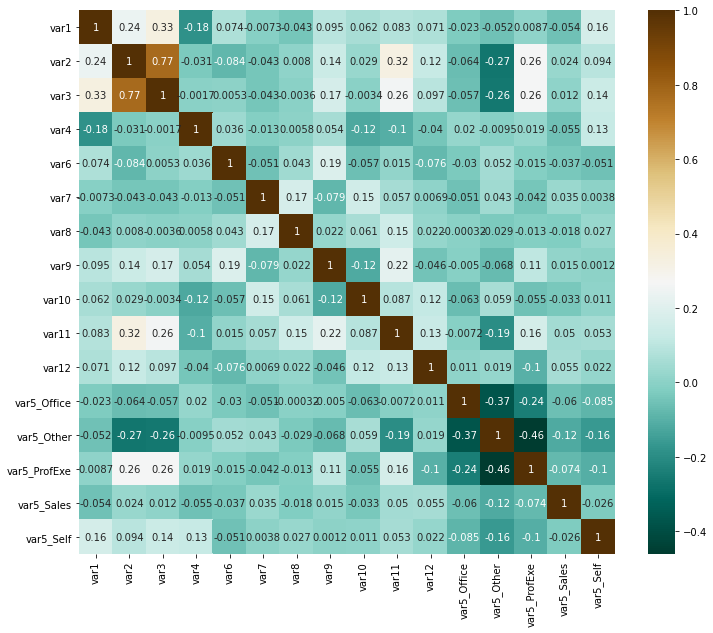

In [60]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BrBG_r)
plt.show()

In [61]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [62]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [63]:
corr_features

{'var3'}

#### Observation:

As var3 is higly correlated with var2,So considering var3 and droping var2

In [64]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,var1,var2,var4,var6,var7,var8,var9,var10,var11,var12,var5_Office,var5_Other,var5_ProfExe,var5_Sales,var5_Self
4303,0.239865,0.170348,0,2.0,0.0,0.0,0.212623,5.0,23.000000,40.962995,0,0,0,0,0
1876,0.128378,0.195823,0,19.0,0.0,0.0,0.216010,10.0,24.000000,35.800492,0,0,0,0,0
5115,0.296171,0.123866,0,6.0,1.0,0.0,0.125537,3.0,29.000000,42.159937,0,1,0,0,0
33,0.020270,0.192552,0,6.0,1.0,0.0,0.141524,2.0,26.000000,33.779915,0,0,1,0,0
4451,0.247748,0.157333,0,2.0,0.0,0.0,0.134113,0.0,21.000000,34.000236,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,0.182432,0.178464,0,5.0,2.0,1.0,0.077296,6.0,30.000000,33.779915,0,1,0,0,0
1966,0.131757,0.125129,1,6.0,0.0,0.0,0.153879,0.0,21.296096,33.779915,0,0,1,0,0
2827,0.165541,0.193320,0,0.0,0.0,0.0,0.130257,0.0,23.000000,42.218282,0,1,0,0,0
5928,0.784910,0.477955,0,10.0,0.0,0.0,0.189695,2.0,25.000000,30.378548,0,0,0,0,1


###### Feature selection through  finding information gain

In [65]:

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03975833, 0.02125109, 0.05747541, 0.0052007 , 0.02592936,
       0.03618897, 0.05668112, 0.03942321, 0.02079197, 0.01996516,
       0.16762248, 0.00076875, 0.00184947, 0.        , 0.00098779,
       0.        ])

In [66]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

var12           0.167622
var3            0.057475
var8            0.056681
var1            0.039758
var9            0.039423
var7            0.036189
var6            0.025929
var2            0.021251
var10           0.020792
var11           0.019965
var4            0.005201
var5_Other      0.001849
var5_Sales      0.000988
var5_Office     0.000769
var5_ProfExe    0.000000
var5_Self       0.000000
dtype: float64

<AxesSubplot:>

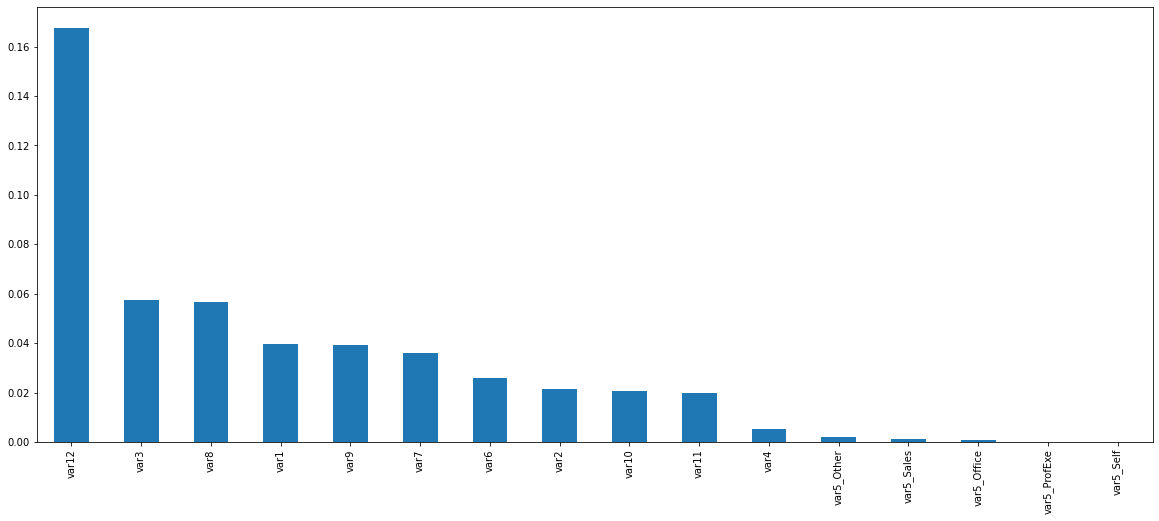

In [67]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### Observation

If the feature has high IG than the feature is to be consider as best feature,Here var12,var3,var8,var1,var9,var6 and var7 has high IG.

#### Chi-square test:

In [72]:
X_train_chi,X_test_chi,y_train_chi,y_test_chi=train_test_split(df1[['var5_Other','var5_Sales','var5_Office','var5_ProfExe','var5_Self','var4']],
                                              df1['Target'],test_size=0.3,random_state=100)

In [76]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train_chi,y_train_chi)

In [81]:
p_values=pd.Series(f_p_values[1])
#p_values.index=X_train.columns
p_values

0    0.007848
1    0.065371
2    0.000035
3    0.000986
4    0.008115
5    0.289882
dtype: float64

In [79]:
p_values.sort_index(ascending= False)

5    0.289882
4    0.008115
3    0.000986
2    0.000035
1    0.065371
0    0.007848
dtype: float64

#### Observation:

If P-value is low then that feature is highly significate,from obseration I am  considering var5

In [82]:
## From above observation this features are seletced to bulid the model
X=df1[['var12','var8','var3','var1','var9','var7','var5_Office','var5_Other','var5_Self','var5_Sales','var5_ProfExe']]

In [83]:

X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((4544, 11), (1137, 11))

 Creating a logistic regression object then creating a GridSearchCV object logreg_cv with cv = 10. 

In [84]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [85]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
gscv = GridSearchCV(lr,parameters,scoring='accuracy',cv=10)
logreg_cv = gscv.fit(X_train,Y_train)

C:\Users\svani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\svani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\svani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch,

C:\Users\svani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\svani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\svani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch,

C:\Users\svani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\svani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\svani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\svani\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch,

In [86]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8210897032482937


Creating a support vector machine object then creating a GridSearchCV object svm_cv with cv - 10.

In [94]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
gscv = GridSearchCV(svm,parameters,scoring='accuracy',cv=10)
svm_cv = gscv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Creating a decision tree classifier object then creating a GridSearchCV object tree_cv with cv = 10. 

In [87]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [88]:
gscv = GridSearchCV(tree,parameters,scoring='accuracy',cv=10)
tree_cv = gscv.fit(X_train,Y_train)

In [89]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8752243791450841


Creating a k nearest neighbors object then creating a GridSearchCV object knn_cv with cv = 10. 

In [90]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [91]:
gscv = GridSearchCV(KNN,parameters,scoring='accuracy',cv=10)
knn_cv = gscv.fit(X_train,Y_train)

In [92]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
accuracy : 0.8734612964128383


In [93]:
## finding best method
algorithms = {'KNN':knn_cv.best_score_,'Tree':tree_cv.best_score_,'LogisticRegression':logreg_cv.best_score_}
bestalgorithm = max(algorithms, key=algorithms.get)
print('Best Algorithm is',bestalgorithm,'with a score of',algorithms[bestalgorithm])
if bestalgorithm == 'Tree':
    print('Best Params is :',tree_cv.best_params_)
if bestalgorithm == 'KNN':
    print('Best Params is :',knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best Params is :',logreg_cv.best_params_)

Best Algorithm is Tree with a score of 0.8752243791450841
Best Params is : {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


+
+
 From the above models,Decision tree algorithm is giving best accuracy


